In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.metrics import roc_curve,roc_auc_score,mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
pd.DataFrame(data)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data=data.drop('Unnamed: 0', axis=1)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
data.shape

(200, 4)

In [5]:
data.isna().sum().sum()

0

No Null values are present inside our dataset

In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

This means we have all numerical data, so we shall proceed ahead for visualization

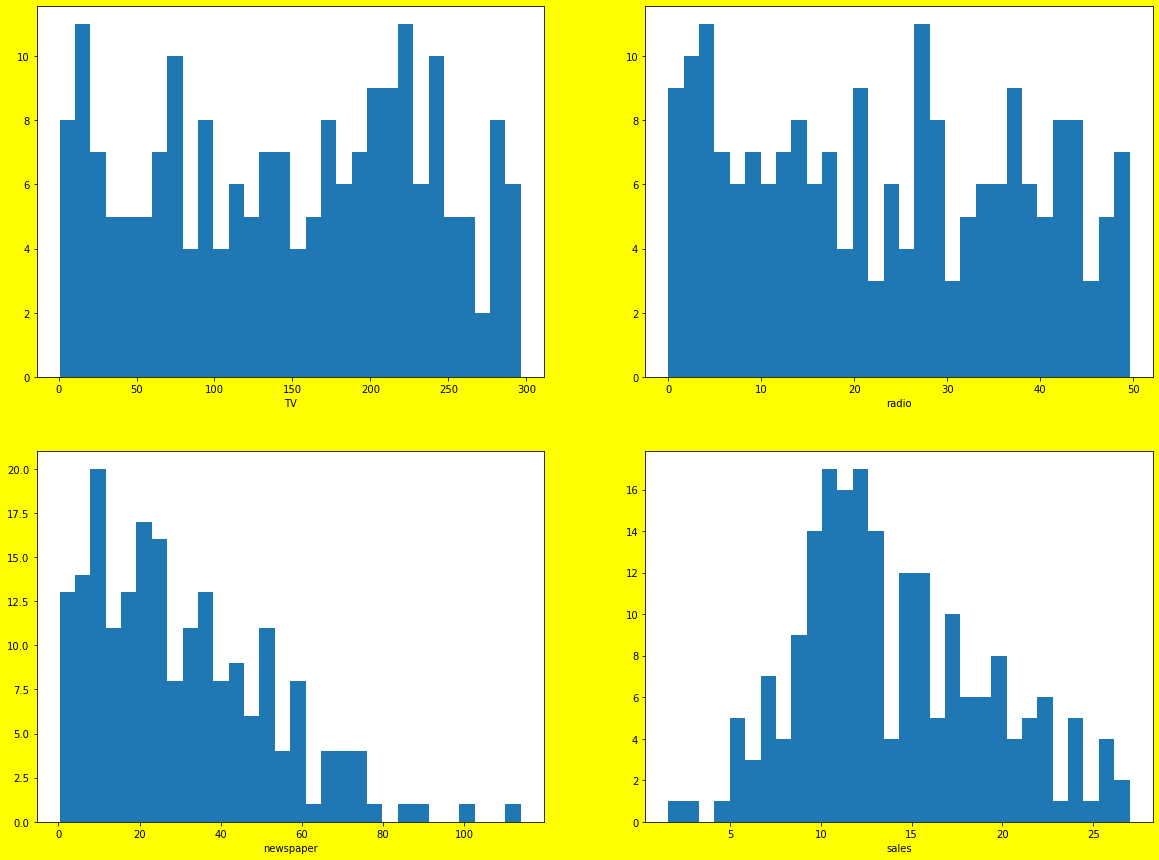

In [8]:
plt.figure(figsize=(20,15),facecolor="yellow")
plotnumber=1
for column in data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        plt.hist(data[column],bins=30)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

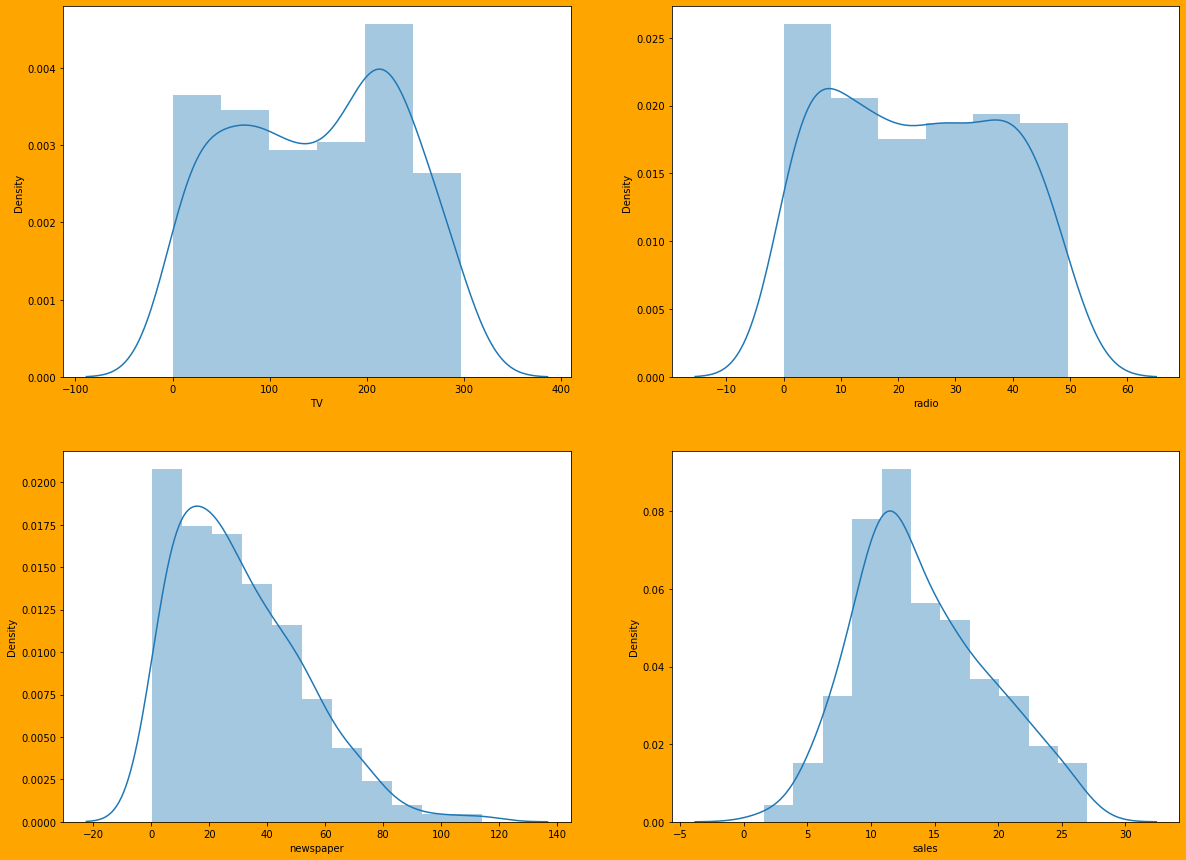

In [9]:
plt.figure(figsize=(20,15),facecolor="orange")
plotnumber=1
for column in data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

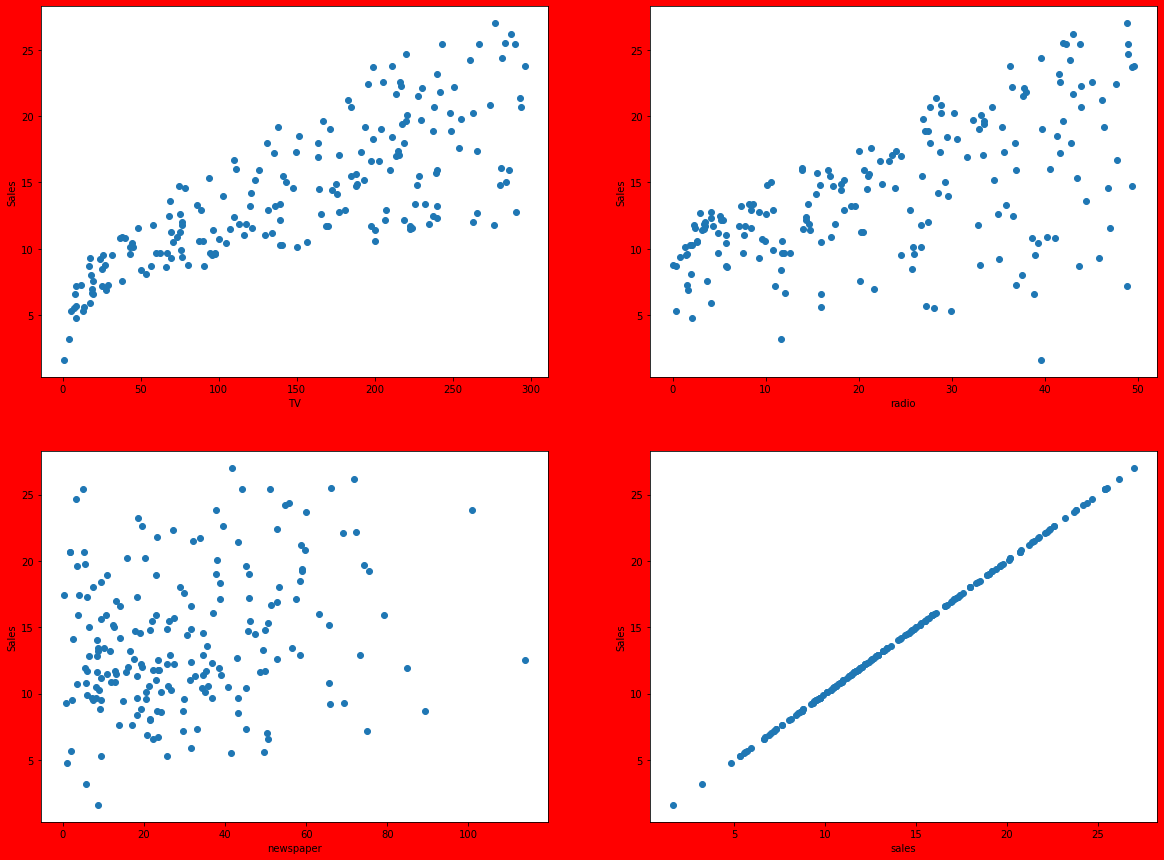

In [10]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        plt.scatter(data[column],data["sales"])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Sales', fontsize=10)
    plotnumber+=1
plt.show()

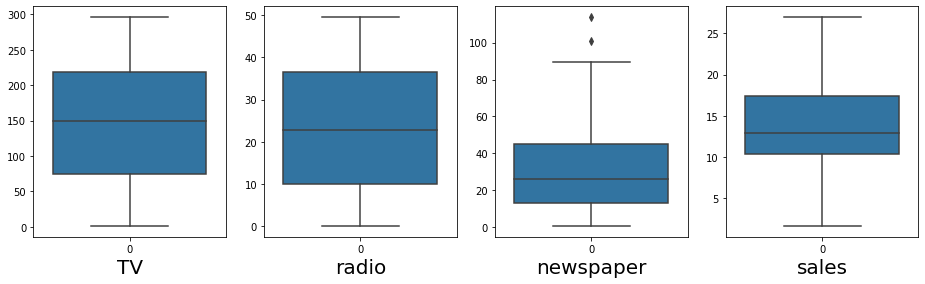

In [11]:
plt.figure(figsize=(20,50))
graph=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(10,5,graph)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

We can see two outliers present in newspaper feature, so let's remove it first

In [12]:
#1st Quantile
q1=data.quantile(0.25)

#3rd Quantile
q3=data.quantile(0.75)

#Inter-quantile Range
iqr=q3-q1

In [13]:
newspaper_high=(q3.newspaper+(1.5*iqr.newspaper))
index=np.where(data['newspaper']>newspaper_high)
data=data.drop(data.index[index])
data.reset_index()

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


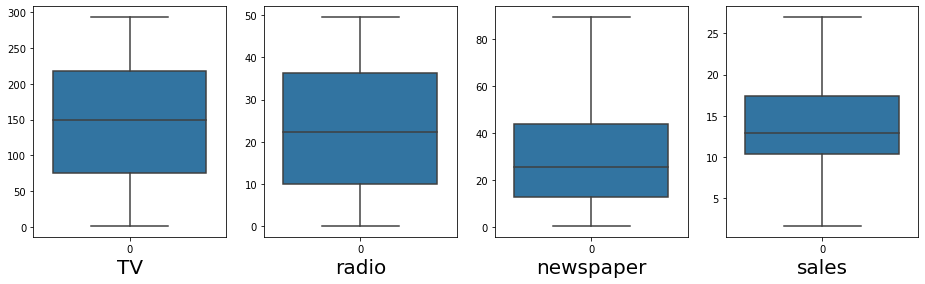

In [14]:
plt.figure(figsize=(20,50))
graph=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(10,5,graph)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

Now, there are no more outliers present in our data, we shall proceed ahead to split our data into features and label

In [15]:
#Splitting features & labels
x=data.drop('sales', axis=1)
y=data['sales']

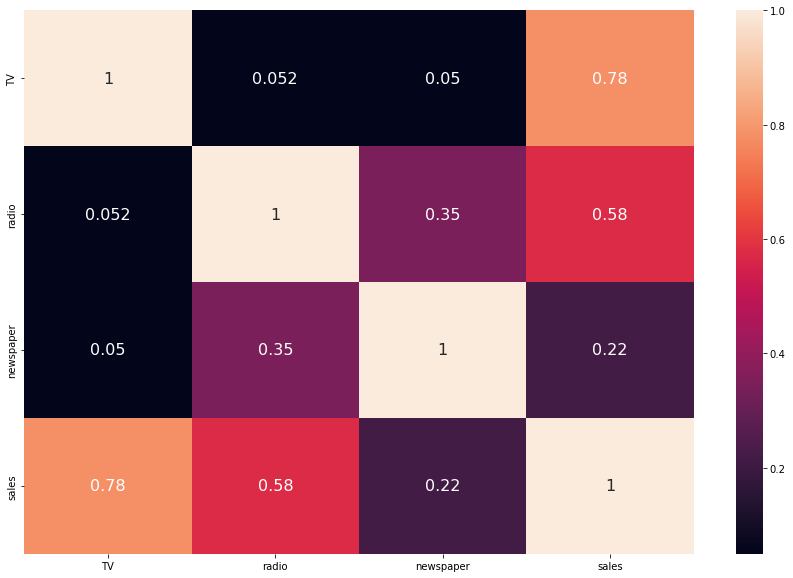

In [16]:
df_corr=data.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True, annot_kws={'size':16})
plt.show()

In [17]:
#These are featueres
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
# This is Label
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [19]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [20]:
#VIF
x_scaled.shape[1]

3

In [21]:
vif=pd.DataFrame()

In [22]:
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [23]:
vif['Features']=x.columns

In [24]:
vif

,vif,Features
0,1.003863,TV
1,1.137887,radio
2,1.137631,newspaper


Since VIF scores are very less than 5 so we can say our data has no multicolinearity problem

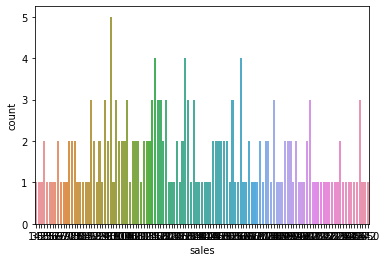

In [25]:
#Checking if dataset is balanced or Imbalanced
sns.countplot(x='sales',data=data)
plt.show()

# Model 1: Linear regression Model

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((138, 3), (60, 3), (138,), (60,))

In [28]:
lr=LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
lr.score(x_train,y_train)

0.8943101904848557

In [31]:
y_pred=lr.predict(x_test)

In [32]:
lr.score(x_test,y_test)

0.8951638820913868

In [33]:
#Checking for Multicolinearity
lasso_cv=LassoCV(alphas=None, max_iter=200, normalize=True)
lasso_cv.fit(x_train,y_train)

LassoCV(max_iter=200, normalize=True)

In [34]:
alpha=lasso_cv.alpha_
alpha

0.0018441648136128493

In [35]:
lasso=Lasso(alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=0.0018441648136128493)

In [36]:
lasso.score(x_test,y_test)

0.8951655342450637

From Above score, it's clear that our model is not overfitted and our model is correct

In [46]:
mean_absolute_error(y_test,y_pred)

1.2555704681549493

In [47]:
mean_squared_error(y_test,y_pred)

2.722806857648329

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.6500929845461223

In [44]:
#Let's save our model for future use

filename = 'ascp_model.sav'
pickle.dump(lr, open(filename, 'wb'))

Model is saved now

In [45]:
#Let's reload our model

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8951638820913868
